### Plot distribution of sequences by year and country

Small notebook for plotting graphs for our presentation. These graphs give a little insight into the distribution of our sequences without 

In [40]:
import pandas as pd
import numpy as np
import matplotlib

In [41]:
rsv_df = pd.read_csv('../rsview/data/RSVG_gb_metadata_0-5000.csv', parse_dates=['collection_date'])

In [42]:
rsv_df['collection_date'] = pd.to_datetime(rsv_df['collection_date'])

In [43]:
rsv_df['year'] = rsv_df['collection_date'].apply(lambda x: x.year)

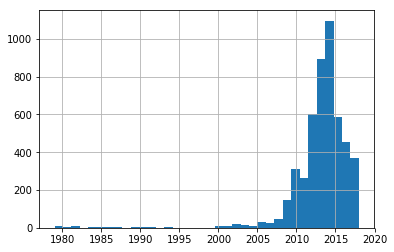

In [61]:
rsv_df['year'].hist(bins=len(rsv_df.groupby('year').count()))

In [45]:
#Fix specific country names where city is given
countries_with_cities = ['Brazil', 'China', 'Russia', 'New Zealand', 'Spain', 'Kenya',
                         'Germany', 'Egypt', 'India', 'Japan', 'Canada', 'Italy',
                         'Malaysia', 'Jordan', 'Saudi Arabia', 'Myanmar', 'Netherlands',
                         'France', 'Peru']
for con in countries_with_cities:
    rsv_df['country'] = np.where(rsv_df['country'].str.contains(con), con, rsv_df['country'])

#Fix specific country names where lat/lon table uses alternate country name
rsv_df['country'] = np.where(rsv_df['country'].str.contains('USA'), 'United States',
                             rsv_df['country'])
rsv_df['country'] = np.where(rsv_df['country'].str.contains('South Korea'), 'Korea',
                             rsv_df['country'])
rsv_df['country'] = np.where(rsv_df['country'].str.contains('Viet Nam'), 'Vietnam',
                             rsv_df['country'])
rsv_df['country'] = np.where(rsv_df['country'].str.contains('Laos'), 'Lao PDR',
                             rsv_df['country'])

In [52]:
rsv_df_bycountry = rsv_df.groupby('country').count()

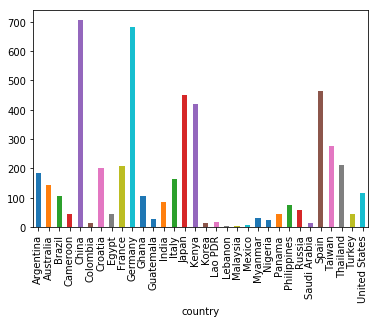

In [62]:
rsv_df_bycountry['Unnamed: 0'].plot.bar()